In [ ]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Look at the big picture


 **Frame the problem**
* My first question will be what exactly the bussiness objective is? I am asked to build a model to really understand which algorithm to choose, which performace measure to use I need to understand How does the company expect to use and benefit from this model.

* Second question would be is there any current solution? That could be my reference for performace.

* By leveraging machine learning techniques, I need to analyze this rich dataset to predict crime categories, enhance law enforcement strategies, and bolster public safety measures.


Q1. What kind of training supervision the model will need: is it a supervised, unsupervised, semi-supervised, self-supervised or reinforcement learning task.

-> Here we have a target variable which has certain categories so its a supervised learning and classification task.
-> It's a batch learning task.

Q2. What performace measure are you using?

-> ---------------

# Get the data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# sample_data = pd.read_csv('/content/sample.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project MLP /test.csv')
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project MLP /train.csv')

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# train_data = pd.read_csv("/content/train.csv")
# test_data = pd.read_csv("/content/test.csv")

In [ ]:
# train_data = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/train.csv")
# test_data = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/test.csv")

# Exploratory data anaylysis (EDA)

In [ ]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

In [ ]:
# target varible categories
train_data.Crime_Category.value_counts()

Crime_Category
Property Crimes                  11666
Violent Crimes                    4767
Crimes against Public Order       1808
Fraud and White-Collar Crimes     1355
Crimes against Persons             225
Other Crimes                       179
Name: count, dtype: int64

In [ ]:
# missing values per feature
train_data.isna().sum()

# key insight: "Cross_street" feature has close to 82% missing values

Location                     0
Cross_Street             16552
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            2741
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12665
Weapon_Description       12665
Status                       0
Status_Description           0
Crime_Category               0
dtype: int64

In [ ]:
# check duplicated rows
train_data.duplicated( keep = "first").value_counts()

False    19987
True        13
Name: count, dtype: int64

In [ ]:
train_data = train_data.drop_duplicates(keep = "first")

In [ ]:
train_data.describe(include= "object")

,Location,Cross_Street,Date_Reported,Date_Occurred,Area_Name,Modus_Operandi,Victim_Sex,Victim_Descent,Premise_Description,Weapon_Description,Status,Status_Description,Crime_Category
count,19987,3447,19987,19987,19987,17249,17365,17365,19982,7330,19987,19987,19987
unique,12399,1495,811,366,21,10489,4,17,216,57,5,5,6
top,6TH,BROADWAY,07/13/2020 12:00:00 AM,01/01/2020 12:00:00 AM,77th Street,0344,M,H,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
freq,33,56,87,137,1345,825,8533,6141,5028,3988,15226,15226,11659


Key insight:
Features datatype
* Text =	5
* Numeric =	8
* DateTime =	2
* Categorical =	7

object and float dtype but in reality there are total of 4 dtypes which needs to be attressed carefully somesh.

In [ ]:
# Calculate the correlation matrix
Numeric_features = train_data.select_dtypes(include=['int64', 'float64'])
corr_matrix = Numeric_features.corr()

corr_matrix



,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
Latitude,1.000000,-0.998911,0.005981,0.018403,0.017920,-0.036343,0.003244,-0.011285,-0.017695
Longitude,-0.998911,1.000000,-0.005372,-0.006481,-0.006139,0.036374,-0.002292,0.011209,0.019220
Time_Occurred,0.005981,-0.005372,1.000000,0.012826,0.012607,-0.028798,-0.017700,-0.057100,-0.017317
Area_ID,0.018403,-0.006481,0.012826,1.000000,0.999024,-0.002305,0.028676,0.004015,-0.026916
Reporting_District_no,0.017920,-0.006139,0.012607,0.999024,1.000000,-0.001916,0.028423,0.004077,-0.026774
Part 1-2,-0.036343,0.036374,-0.028798,-0.002305,-0.001916,1.000000,0.186775,0.254277,0.420356
Victim_Age,0.003244,-0.002292,-0.017700,0.028676,0.028423,0.186775,1.000000,0.191358,0.057888
Premise_Code,-0.011285,0.011209,-0.057100,0.004015,0.004077,0.254277,0.191358,1.000000,0.197275
Weapon_Used_Code,-0.017695,0.019220,-0.017317,-0.026916,-0.026774,0.420356,0.057888,0.197275,1.000000


In [ ]:
train_data.nunique()

#key insight:
# there are some categorica features which are already encoded in nuric form, keep it in mind when doing preprocessing.

Location                 12399
Cross_Street              1495
Latitude                  3622
Longitude                 3578
Date_Reported              811
Date_Occurred              366
Time_Occurred              996
Area_ID                     21
Area_Name                   21
Reporting_District_no     1120
Part 1-2                     2
Modus_Operandi           10489
Victim_Age                 100
Victim_Sex                   4
Victim_Descent              17
Premise_Code               217
Premise_Description        216
Weapon_Used_Code            57
Weapon_Description          57
Status                       5
Status_Description           5
Crime_Category               6
dtype: int64

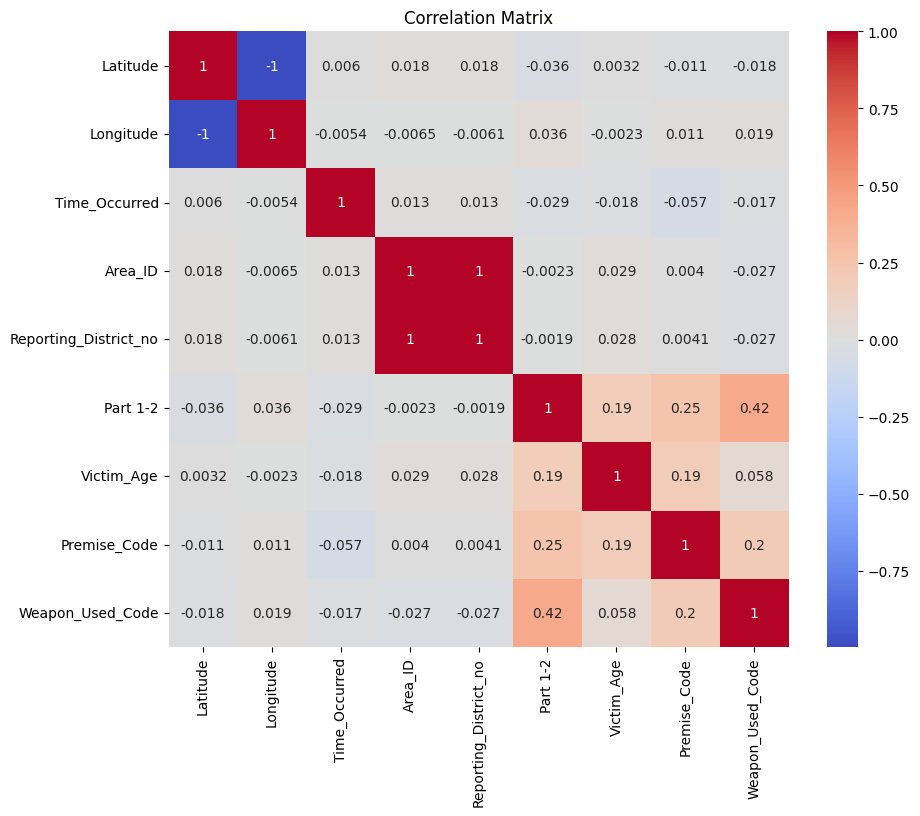

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


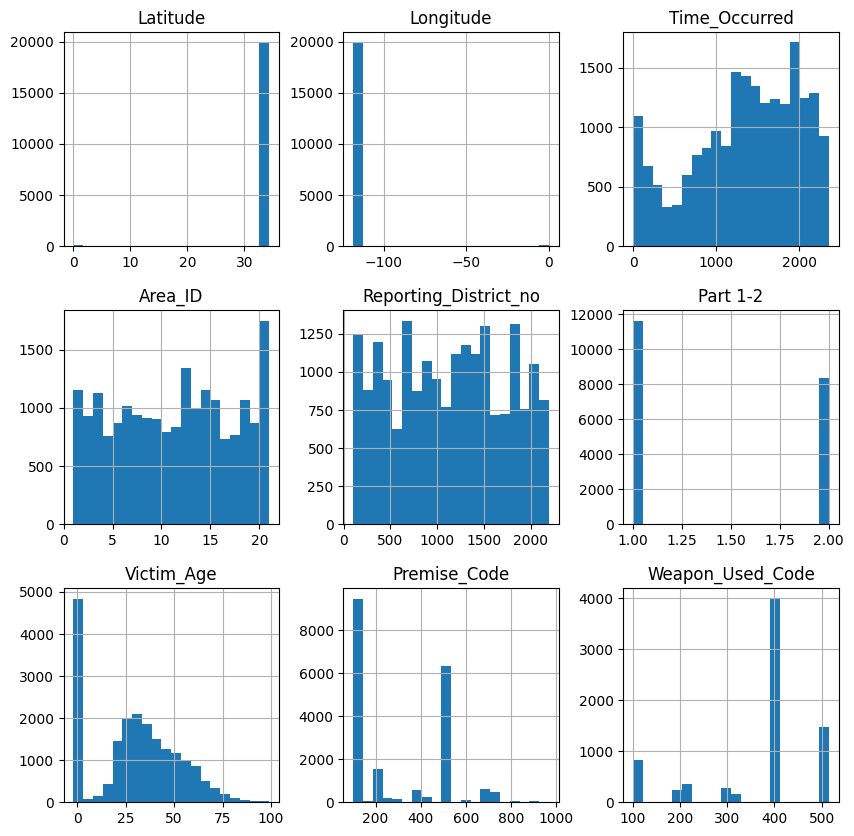

In [ ]:

Numeric_features.hist(bins=20, figsize=(10, 10))
plt.show()

# key insight: look at the last 3 histograms, first there is imbalance of datavalues which will cause problems later, second vitim age has more value of zero.

In [ ]:
train_data.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


# Key insights from EDA




**Location**: contains string values, needs TF-IDF type encoding

**Cross_Street:** close to 82% values are missing, dropping the column seems right apprach here

**Latitute and Longitude**:  correlated to each other, needs encoding




**Date_reported, Date_occured, Time_occured:**  right now dtype is float, need to convert to datetime and extract features out of it like day, month etc.



**Area_Id:** 21 distinct values, correlated with Area_name and Reporting_dist_number

**Area_Name**: 21 distinct values(string)

**Reporting_district_number**: 1120 unique numeric values highly correlated with Area_Id

**Part1-2**: only two values 1 and 2

**Modus_operandi**: bunch of interger codes, don't know what to do with them

**Victim_Age**: some absured values are there like 0

**Victim_Sex**: 4 categories, some missing values

**Victim_Discent**: 17 categories coded with alphabets(string) and some missing
values.

**Premise_code**: real numbers 217

**Premsise_description**: string description

**Weapon_used_code**: real number, 63% missing vlaues, imbalance

**Weapon_description**: string, lot of missing values 63%

**Status and Status_description**: categories of 5, one category is hightly dominating, imbalanced, highly correlated to each other.




# Data preprocessing

In [ ]:
# these are the features with missing values.......
# Weapon_Used_Code         12665 (63% missing)
# Weapon_Description       12665 (63% missing)
# Modus_Operandi            2741 (no significance)
# Victim_Sex                2624
# Victim_Descent            2624
# Cross_Street             16552 (82% missing)


# column "Victim_Age" has outlier values like -1,-2 and 0

'''
the problem is we have mixed type featues, we have categorical, numerical, date time and simple text type featues
for which we going to need different imputation and encoding techniques.

'''



'\nthe problem is we have mixed type featues, we have categorical, numerical, date time and simple text type featues\nfor which we going to need different imputation and encoding techniques.\n\n'

In [ ]:
# imputing columns of training and test data

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
SI1= SimpleImputer(strategy='most_frequent')
SI2= KNNImputer()
train_data[['Victim_Sex', 'Victim_Descent', 'Premise_Description','Modus_Operandi']] = SI1.fit_transform(train_data[['Victim_Sex', 'Victim_Descent',"Premise_Description", "Modus_Operandi"]])
train_data[ "Weapon_Used_Code"] = SI2.fit_transform(train_data[[ "Weapon_Used_Code"]])


# applying similar transformation to test featurs

test_data[['Victim_Sex', 'Victim_Descent',"Premise_Description",'Modus_Operandi']] = SI1.transform(test_data[['Victim_Sex', 'Victim_Descent',"Premise_Description", "Modus_Operandi"]])
test_data[ "Weapon_Used_Code"] = SI2.transform(test_data[["Weapon_Used_Code"]])
print("done")

done


In [ ]:
train_data["Modus_Operandi"].head()

0                                       0385
1    0906 0352 0371 0446 1822 0344 0416 0417
2                                  0329 1202
3                                  0329 1300
4              0416 0945 1822 0400 0417 0344
Name: Modus_Operandi, dtype: object

In [ ]:
train_data['code_count'] = train_data['Modus_Operandi'].apply(lambda x: len(str(x).split()))
test_data['code_count'] = test_data['Modus_Operandi'].apply(lambda x: len(str(x).split()))

In [ ]:
train_data[ "code_count"].head(15)

0     1
1     8
2     2
3     2
4     6
5     2
6     1
7     2
8     1
9     3
10    5
11    7
12    1
13    2
14    5
Name: code_count, dtype: int64

In [ ]:
print(train_data['Modus_Operandi'].isnull().sum())

0


In [ ]:
print(train_data['Modus_Operandi'].dtype)

object


In [ ]:
train_data["Modus_Operandi"].head()

0                                       0385
1    0906 0352 0371 0446 1822 0344 0416 0417
2                                  0329 1202
3                                  0329 1300
4              0416 0945 1822 0400 0417 0344
Name: Modus_Operandi, dtype: object

In [ ]:

import pandas as pd

train_data['Modus_Operandi'] = train_data['Modus_Operandi'].astype(str)

# Calculate the frequency of each code across the entire column
code_freq = train_data['Modus_Operandi'].apply(lambda x: x.split()).explode().value_counts()
code_freq_dict = code_freq.to_dict()

# Create a new column to store the Code Frequency Sum
def calculate_code_freq_sum(codes):
    return sum(code_freq_dict.get(code, 0) for code in codes.split())

train_data['Code_Frequency_Sum'] = train_data['Modus_Operandi'].apply(calculate_code_freq_sum)

test_data['Modus_Operandi'] = test_data['Modus_Operandi'].astype(str)
test_data['Code_Frequency_Sum'] = test_data['Modus_Operandi'].apply(calculate_code_freq_sum)

print("done")


done


In [ ]:
train_data['Code_Frequency_Sum'].head()

0      352
1    19179
2     3852
3     4865
4    19241
Name: Code_Frequency_Sum, dtype: int64

In [ ]:
train_data.drop(columns=['Modus_Operandi'], inplace=True)
test_data.drop(columns=['Modus_Operandi'], inplace=True)

print("done")

done


In [ ]:
# addressing outliers in column "Victim_Age"

train_data["Victim_Age"] = train_data["Victim_Age"].replace([-1,-2,0], np.nan)
test_data["Victim_Age"] = test_data["Victim_Age"].replace([-1,-2,0], np.nan)

# values such as -1,-2 and 0 treating them in unknown values and imputing with median

imp2 = SimpleImputer(strategy='median')
train_data["Victim_Age"] = imp2.fit_transform(train_data[["Victim_Age"]])
test_data["Victim_Age"] = imp2.transform(test_data[["Victim_Age"]])

print("done")

done


In [ ]:
# using this imputation strategy for those text features which has high number of missing values.

train_data['Cross_Street'] = train_data['Cross_Street'].fillna('Unknown')
# train_data['Modus_Operandi'] = train_data['Modus_Operandi'].fillna('Unknown')
train_data['Weapon_Description'] = train_data['Weapon_Description'].fillna('Unknown')



test_data['Cross_Street'] = test_data['Cross_Street'].fillna('Unknown')
# test_data['Modus_Operandi'] = test_data['Modus_Operandi'].fillna('Unknown')
test_data['Weapon_Description'] = test_data['Weapon_Description'].fillna('Unknown')





print("done")

done


In [ ]:
# encoding text features

from sklearn.preprocessing import LabelEncoder

encoded_values = {}
column_list = ['Cross_Street','Premise_Description','Weapon_Description' , 'Location' , 'Status', 'Status_Description' ]


for col in column_list:
    label_encoder = LabelEncoder()
    train_data[col] = label_encoder.fit_transform(train_data[col])

    # handle unseen labels in test data
    test_data[col] = test_data[col].map(lambda x: 'Unknown' if x not in label_encoder.classes_ else x)
    label_encoder.classes_ = np.append(label_encoder.classes_, 'Unknown')

    # transforming test data
    test_data[col] = label_encoder.transform(test_data[col])




print("done")

done


In [ ]:
# Handling data time featues (train data)
# Ensure there are no missing values in the relevant columns

train_data = train_data.dropna(subset=['Date_Reported', 'Date_Occurred', 'Time_Occurred'])

# Specify the correct datetime format
date_format = "%m/%d/%Y %I:%M:%S %p"

# Handling datetime features
train_data['Date_Reported'] = pd.to_datetime(train_data['Date_Reported'], format=date_format)
train_data['Date_Occurred'] = pd.to_datetime(train_data['Date_Occurred'], format=date_format)

# Extracting date components
train_data['Day_Reported'] = train_data['Date_Reported'].dt.day
train_data['Month_Reported'] = train_data['Date_Reported'].dt.month
train_data['Year_Reported'] = train_data['Date_Reported'].dt.year

train_data['Day_Occurred'] = train_data['Date_Occurred'].dt.day
train_data['Month_Occurred'] = train_data['Date_Occurred'].dt.month
train_data['Year_Occurred'] = train_data['Date_Occurred'].dt.year

# Extracting time components
train_data['Hour_Occurred'] = (train_data['Time_Occurred'] // 100).astype(int)  # Extract hour
train_data['Minute_Occurred'] = train_data['Time_Occurred'] % 100  # Extract minute

train_data.drop(columns=['Date_Reported', 'Date_Occurred', 'Time_Occurred'], inplace=True)

print("done")

done


In [ ]:
#  Handling data time featues ( test data)
# Specify the correct datetime format
date_format = "%m/%d/%Y %I:%M:%S %p"

# Handling datetime features


test_data['Date_Reported'] = pd.to_datetime(test_data['Date_Reported'], format = date_format)
test_data['Date_Occurred'] = pd.to_datetime(test_data['Date_Occurred'], format = date_format)


test_data['Day_Reported'] = test_data['Date_Reported'].dt.day
test_data['Month_Reported'] = test_data['Date_Reported'].dt.month
test_data['Year_Reported'] = test_data['Date_Reported'].dt.year

test_data['Day_Occurred'] = test_data['Date_Occurred'].dt.day
test_data['Month_Occurred'] = test_data['Date_Occurred'].dt.month
test_data['Year_Occurred'] = test_data['Date_Occurred'].dt.year


test_data['Hour_Occurred'] = (test_data['Time_Occurred'] // 100).astype(int)  # Extract hour (integer division by 100)
test_data['Minute_Occurred'] = test_data['Time_Occurred'] % 100  # Extract minute (modulo 100)


test_data.drop(columns=['Date_Reported', 'Date_Occurred', 'Time_Occurred'], inplace=True)
print("done")

done


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Define the categorical features
categorical_features = ['Victim_Sex', 'Victim_Descent', 'Area_Name']

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output =False)

# Fit and transform the training data
encoded_train_data = encoder.fit_transform(train_data[categorical_features])

# Convert the encoded features to a DataFrame
encoded_train_df = pd.DataFrame(encoded_train_data, columns=encoder.get_feature_names_out(categorical_features))

# Drop the original categorical columns and concatenate the encoded features
train_data = train_data.drop(columns=categorical_features).reset_index(drop=True)
train_data = pd.concat([train_data, encoded_train_df], axis=1)




# Transform the test data using the same encoder
encoded_test_data = encoder.transform(test_data[categorical_features])

# Convert the encoded features to a DataFrame
encoded_test_df = pd.DataFrame(encoded_test_data, columns=encoder.get_feature_names_out(categorical_features))

# Drop the original categorical columns and concatenate the encoded features
test_data = test_data.drop(columns=categorical_features).reset_index(drop=True)
test_data = pd.concat([test_data, encoded_test_df], axis=1)

print("done")

done


In [ ]:
train_data.head()

,Location,Cross_Street,Latitude,Longitude,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Premise_Description,...,Area_Name_Olympic,Area_Name_Pacific,Area_Name_Rampart,Area_Name_Southeast,Area_Name_Southwest,Area_Name_Topanga,Area_Name_Van Nuys,Area_Name_West LA,Area_Name_West Valley,Area_Name_Wilshire
0,7238,1325,34.1522,-118.3910,15.0,1563.0,1.0,75.0,101.0,186,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7300,167,34.0028,-118.2391,13.0,1367.0,1.0,41.0,216.0,188,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8525,1325,34.0111,-118.2653,13.0,1343.0,2.0,67.0,501.0,177,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2879,1325,34.2953,-118.4590,19.0,1924.0,1.0,61.0,101.0,186,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9584,1325,33.9787,-118.2918,12.0,1245.0,1.0,37.0,401.0,88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_data.columns

Index(['Location', 'Cross_Street', 'Latitude', 'Longitude', 'Area_ID',
       'Reporting_District_no', 'Part 1-2', 'Victim_Age', 'Premise_Code',
       'Premise_Description', 'Weapon_Used_Code', 'Weapon_Description',
       'Status', 'Status_Description', 'Crime_Category', 'code_count',
       'Code_Frequency_Sum', 'Day_Reported', 'Month_Reported', 'Year_Reported',
       'Day_Occurred', 'Month_Occurred', 'Year_Occurred', 'Hour_Occurred',
       'Minute_Occurred', 'Victim_Sex_F', 'Victim_Sex_H', 'Victim_Sex_M',
       'Victim_Sex_X', 'Victim_Descent_A', 'Victim_Descent_B',
       'Victim_Descent_C', 'Victim_Descent_D', 'Victim_Descent_F',
       'Victim_Descent_G', 'Victim_Descent_H', 'Victim_Descent_I',
       'Victim_Descent_J', 'Victim_Descent_K', 'Victim_Descent_O',
       'Victim_Descent_P', 'Victim_Descent_U', 'Victim_Descent_V',
       'Victim_Descent_W', 'Victim_Descent_X', 'Victim_Descent_Z',
       'Area_Name_77th Street', 'Area_Name_Central', 'Area_Name_Devonshire',
       '

In [ ]:
train_data.head()

,Location,Cross_Street,Latitude,Longitude,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Premise_Description,...,Area_Name_Olympic,Area_Name_Pacific,Area_Name_Rampart,Area_Name_Southeast,Area_Name_Southwest,Area_Name_Topanga,Area_Name_Van Nuys,Area_Name_West LA,Area_Name_West Valley,Area_Name_Wilshire
0,7238,1325,34.1522,-118.3910,15.0,1563.0,1.0,75.0,101.0,186,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7300,167,34.0028,-118.2391,13.0,1367.0,1.0,41.0,216.0,188,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8525,1325,34.0111,-118.2653,13.0,1343.0,2.0,67.0,501.0,177,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2879,1325,34.2953,-118.4590,19.0,1924.0,1.0,61.0,101.0,186,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9584,1325,33.9787,-118.2918,12.0,1245.0,1.0,37.0,401.0,88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


-----------------------

In [ ]:
# Feature scaling

# Features (numerical) who needs featue scaling
Numeric_features = ["Latitude","Longitude","Area_ID","Reporting_District_no","Victim_Age", "Premise_Code","Code_Frequency_Sum"]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_data[Numeric_features] = scaler.fit_transform(train_data[Numeric_features])


# Feature scaling

# Features (numerical) who needs featue scaling

test_data[Numeric_features] = scaler.transform(test_data[Numeric_features])

In [ ]:
# Handling target variable "Crime_Category"

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data['Crime_Category'] = le.fit_transform(train_data['Crime_Category'])
print("done")

done


In [ ]:
preprocessed_data = train_data.copy()
preprocessed_data.shape

(19987, 67)

## Other tested techniques

In [ ]:
# # encoding text features

# from sklearn.feature_extraction.text import TfidfVectorizer

# # Initialize an empty DataFrame to store the transformed features
# transformed_features = pd.DataFrame()

# # Loop through each text column and apply TfidfVectorizer
# for col in ['Premise_Description', 'Location']:
#     vectorizer = TfidfVectorizer()
#     tfidf_matrix = vectorizer.fit_transform(train_data[col])

#     # Convert the sparse matrix to a dense DataFrame
#     tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=[f"{col}_{feature}" for feature in vectorizer.get_feature_names_out()])

#     # Ensure the index matches the original DataFrame
#     tfidf_df.index = train_data.index

#     # Concatenate the transformed features to the DataFrame
#     transformed_features = pd.concat([transformed_features, tfidf_df], axis=1)

# # Drop the original text columns from the DataFrame
# train_data = train_data.drop(columns=['Premise_Description', 'Location'])

# # Concatenate the transformed features with the original DataFrame
# train_data = pd.concat([train_data, transformed_features], axis=1)

# train_data.columns


In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# import pandas as pd

# # Initialize TfidfVectorizer with desired parameters
# vectorizer = TfidfVectorizer(max_features=1000, max_df=0.75)

# # Fit the vectorizer on the training data
# vectorizer.fit(train_data['Premise_Description'] + ' ' + train_data['Location'])

# # Transform the training data
# train_tfidf_features = pd.concat(
#     [pd.DataFrame(vectorizer.transform(train_data[col]).toarray(),
#                   columns=[f"{col}_{feature}" for feature in vectorizer.get_feature_names_out()],
#                   index=train_data.index)
#      for col in ['Premise_Description', 'Location']],
#     axis=1
# )

# # Transform the test data
# test_tfidf_features = pd.concat(
#     [pd.DataFrame(vectorizer.transform(test_data[col]).toarray(),
#                   columns=[f"{col}_{feature}" for feature in vectorizer.get_feature_names_out()],
#                   index=test_data.index)
#      for col in ['Premise_Description', 'Location']],
#     axis=1
# )

# # Drop the original text columns and concatenate the transformed features for training data
# train_data = train_data.drop(columns=['Premise_Description', 'Location']).join(train_tfidf_features)

# # Drop the original text columns and concatenate the transformed features for test data
# test_data = test_data.drop(columns=['Premise_Description', 'Location']).join(test_tfidf_features)




In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# import pandas as pd

# # Fill NaN values with an empty string
# train_data['Premise_Description'] = train_data['Premise_Description'].fillna('')
# train_data['Location'] = train_data['Location'].fillna('')
# test_data['Premise_Description'] = test_data['Premise_Description'].fillna('')
# test_data['Location'] = test_data['Location'].fillna('')

# # Initialize TfidfVectorizer with desired parameters
# vectorizer = TfidfVectorizer()

# # Combine the columns for fitting
# combined_train_data = train_data['Premise_Description'] + ' ' + train_data['Location']
# combined_test_data = test_data['Premise_Description'] + ' ' + test_data['Location']

# # Fit the vectorizer on the combined training data
# vectorizer.fit(combined_train_data)

# # Transform the training data
# train_tfidf_features = pd.DataFrame(vectorizer.transform(combined_train_data).toarray(),
#                                     columns=vectorizer.get_feature_names_out(),
#                                     index=train_data.index)

# # Transform the test data
# test_tfidf_features = pd.DataFrame(vectorizer.transform(combined_test_data).toarray(),
#                                    columns=vectorizer.get_feature_names_out(),
#                                    index=test_data.index)

# # Drop the original text columns and concatenate the transformed features for training data
# train_data = train_data.drop(columns=['Premise_Description', 'Location']).join(train_tfidf_features)

# # Drop the original text columns and concatenate the transformed features for test data
# test_data = test_data.drop(columns=['Premise_Description', 'Location']).join(test_tfidf_features)


In [ ]:
# # Apply Truncated SVD

# from sklearn.decomposition import TruncatedSVD
# svd = TruncatedSVD(n_components=1000)  # Adjust the number of components as needed
# reduced_matrix = svd.fit_transform(tfidf_matrix)

# # Check the explained variance
# explained_variance = svd.explained_variance_ratio_
# total_explained_variance = explained_variance.sum()
# print(f"Total Explained Variance: {total_explained_variance}")

# # Output the reduced matrix
# print(reduced_matrix)

In [ ]:
# # using a different encoding tecnique for two features Status and Status_Description because of imbalance in categorical values.


# # calculate the frequency of each category in feat1 and feat2
# freq_feat1 = train_data['Status'].value_counts() / len(train_data)
# freq_feat2 = train_data['Status_Description'].value_counts() / len(train_data)

# # calculate the weighted encoding for each category using an alternative strategy
# weighted_feat1 = 1 / freq_feat1  # inverse frequency
# weighted_feat2 = 1 / freq_feat2  # inverse frequency

# # create a dictionary to map categories to their weighted values
# weighted_dict = {'Status': weighted_feat1, 'Status_Description': weighted_feat2}

# # apply the weighted encoding to feat1 and feat2
# train_data['Status'] = train_data['Status'].map(weighted_dict['Status'])
# train_data['Status_Description'] = train_data['Status_Description'].map(weighted_dict['Status_Description'])
# print("done")

In [ ]:
# # applying the same transformation to test data features

# # calculate the frequency of each category in feat1 and feat2
# freq_feat1 = test_data['Status'].value_counts() / len(test_data)
# freq_feat2 = test_data['Status_Description'].value_counts() / len(test_data)

# # calculate the weighted encoding for each category using an alternative strategy
# weighted_feat1 = 1 / freq_feat1  # inverse frequency
# weighted_feat2 = 1 / freq_feat2  # inverse frequency

# # create a dictionary to map categories to their weighted values
# weighted_dict = {'Status': weighted_feat1, 'Status_Description': weighted_feat2}

# # apply the weighted encoding to feat1 and feat2
# test_data['Status'] = test_data['Status'].map(weighted_dict['Status'])
# test_data['Status_Description'] = test_data['Status_Description'].map(weighted_dict['Status_Description'])
# print("done")

In [ ]:
# # encoding categorical features
# # categorical features =  Victim_Sex, Victim_Descent, Area_Name


# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import OneHotEncoder
# import pandas as pd

# # Define the categorical features
# categorical_features = ['Victim_Sex', 'Victim_Descent', 'Area_Name']

# # Create a ColumnTransformer to apply OneHotEncoder to categorical features
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical_features)
#     ],
#     remainder='passthrough'
# )

# # Create a pipeline that includes the ColumnTransformer
# preprocessing_pipeline = Pipeline([
#     ('preprocessor', preprocessor)
# ])

# # Fit and transform the training data
# preprocessing_pipeline.fit(train_data)
# transformed_data = preprocessing_pipeline.fit_transform(train_data)

# # Convert the transformed data back to a DataFrame
# transformed_df = pd.DataFrame(transformed_data, columns=preprocessing_pipeline.named_steps['preprocessor'].get_feature_names_out())

# # Replace the original train_data with the transformed DataFrame
# train_data = transformed_df



# # Transform the test data using the same pipeline
# transformed_test_data = preprocessing_pipeline.transform(test_data)

# # Convert the transformed test data back to a DataFrame
# transformed_test_df = pd.DataFrame(transformed_test_data, columns=preprocessing_pipeline.named_steps['preprocessor'].get_feature_names_out())

# # Replace the original test_data with the transformed DataFrame
# test_data = transformed_test_df



In [ ]:
# # dropping 4 columns ( test model performace by deleting these features)
# train_data.drop(columns=['Weapon_Used_Code', 'Weapon_Description', 'Modus_Operandi', 'Cross_Street'], inplace=True)
# test_data.drop(columns=['Weapon_Used_Code', 'Weapon_Description', 'Modus_Operandi', 'Cross_Street'],inplace = True)

# Data spliting (training | validation)

In [ ]:
# dividing dataset into trainging and validation set


#  'x' contains your features and 'y' contains your target
X = preprocessed_data.drop('Crime_Category', axis=1)
Y = preprocessed_data['Crime_Category']


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2,random_state=42,)


# Feature selection


 Here testing different models on selected featues, testing is done on validatioan set

 Testing on validation set without feature selection has also been done

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# Define the estimator (Random Forest) and RFE
estimator = RandomForestClassifier(n_estimators=100, random_state=42)
selector = RFE(estimator, n_features_to_select= 20)

# Fit the RFE to the training data
selector.fit(x_train, y_train)

# Get the selected features
selected_features = x_train.columns[selector.support_]


In [ ]:
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier


In [ ]:
# Define the models to test
models = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    SVC(),
    AdaBoostClassifier(),
    BaggingClassifier()
]

# Test each model
for model in models:
    model_name = model.__class__.__name__
    print(f"Testing {model_name}...")

    # Train the model
    model.fit(x_train[selected_features], y_train)

    # Predict on test data
    y_pred = model.predict(x_test[selected_features])

    # Get accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.3f}\n")

Testing KNeighborsClassifier...
Accuracy: 0.751

Testing DecisionTreeClassifier...
Accuracy: 0.881

Testing RandomForestClassifier...
Accuracy: 0.908

Testing GradientBoostingClassifier...
Accuracy: 0.922

Testing SVC...
Accuracy: 0.645

Testing AdaBoostClassifier...
Accuracy: 0.811

Testing BaggingClassifier...
Accuracy: 0.904



In [ ]:
from xgboost import  XGBClassifier

# Define the model to test
model = XGBClassifier()


# Train the model
model.fit(x_train[selected_features], y_train)

# Predict on test data
y_pred = model.predict(x_test[selected_features])

# Get accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}\n")


Accuracy: 0.918



## other tested techniques

In [ ]:
# from sklearn.feature_selection import RFE
# from sklearn.ensemble import RandomForestClassifier


# # Use RFE with a Random Forest classifier
# rfe = RFE(RandomForestClassifier( )) # half the features will be selected
# rfe.fit(x_train, y_train)
# rfe.support_




# # Get the selected features
# selected_features = x_train.columns[rfe.support_]

# # # Use Mutual Information test to validate the results
# # mutual_info = mutual_info_classif(x_train, y_train)

# # Print the results
# print("Selected features:", selected_features)
# # print("Mutual Information:", mutual_info)


In [ ]:
# # data after preprocessing and feature selection
# X = X.loc[:, selected_features]

# x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2,random_state=42,)

In [ ]:
# from sklearn.feature_selection import RFE
# from sklearn.ensemble import RandomForestClassifier

# from sklearn.metrics import accuracy_score



# model = RandomForestClassifier()

# # Initialize RFE with the model and number of features to select
# rfe = RFE(model )

# # Fit RFE on the training data and transform it
# X_train_rfe = rfe.fit_transform(x_train, y_train)

# # Transform the test data
# X_test_rfe = rfe.transform(x_test)

# # Train the model on the selected features
# model.fit(X_train_rfe, y_train)

# # Make predictions on the test data
# y_pred_rfe = model.predict(X_test_rfe)

# # Evaluate the model
# print("RFE Test Accuracy:", accuracy_score(y_test, y_pred_rfe))

# # RFE Test Accuracy: 0.9054527263631816

In [ ]:


# # Fit RFE on the entire training data and transform it
# X_train_rfe = rfe.fit_transform(X, Y)

# # Train the model on the selected features
# model.fit(X_train_rfe, Y)

# # Transform the test data using the selected features
# X_TEST_rfe = rfe.transform(test_data)

# # Make predictions on the test data
# y_pred = model.predict(X_TEST_rfe)


In [ ]:
# from sklearn.feature_selection import RFE
# from sklearn.ensemble import GradientBoostingClassifier

# from sklearn.metrics import accuracy_score



# model = GradientBoostingClassifier()

# # Initialize RFE with the model and number of features to select
# rfe = RFE(model )

# # Fit RFE on the training data and transform it
# X_train_rfe = rfe.fit_transform(x_train, y_train)

# # Transform the test data
# X_test_rfe = rfe.transform(x_test)

# # Train the model on the selected features
# model.fit(X_train_rfe, y_train)

# # Make predictions on the test data
# y_pred_rfe = model.predict(X_test_rfe)

# # Evaluate the model
# print("RFE Test Accuracy:", accuracy_score(y_test, y_pred_rfe))

# RFE Test Accuracy: 0.9187093546773387

In [ ]:
# from sklearn.feature_selection import RFE
# from sklearn.tree import DecisionTreeClassifier

# from sklearn.metrics import accuracy_score



# model = DecisionTreeClassifier()

# # Initialize RFE with the model and number of features to select
# rfe = RFE(model )

# # Fit RFE on the training data and transform it
# X_train_rfe = rfe.fit_transform(x_train, y_train)

# # Transform the test data
# X_test_rfe = rfe.transform(x_test)

# # Train the model on the selected features
# model.fit(X_train_rfe, y_train)

# # Make predictions on the test data
# y_pred_rfe = model.predict(X_test_rfe)

# # Evaluate the model
# print("RFE Test Accuracy:", accuracy_score(y_test, y_pred_rfe))
#

# RFE Test Accuracy: 0.8851925962981491

In [ ]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import mutual_info_classif
# select= SelectKBest(score_func = mutual_info_classif, k = 30 )
# select.fit(X,Y)


In [ ]:
# select.get_support()

# Baseline  model


In [ ]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy = "most_frequent")
dummy.fit(x_train, y_train)
dummy.predict(x_test)
dummy.score(x_test, y_test)

0.5777888944472236

# Model training

Model testing on subset of training data and validation set without feature selection.|

In [ ]:
# # model 1
# from sklearn.linear_model import LogisticRegression
# lr = LogisticRegression()
# lr.fit(x_train, y_train)
# lr.score(x_test, y_test)

In [ ]:
# # model 2
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier()
# knn.fit(x_train, y_train)
# knn.score(x_test, y_test)

# # knn.fit(X,Y)
# # knn.score(test_data, jo kaggle pe hai)

In [ ]:
# # model 3
# from sklearn.tree import DecisionTreeClassifier
# dt = DecisionTreeClassifier()
# dt.fit(x_train, y_train)
# dt.score(x_test, y_test)

In [ ]:
# # modle 4
# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier()
# rf.fit(x_train, y_train)
# rf.score(x_test, y_test)

In [ ]:
# # # model 5
# from sklearn.ensemble import GradientBoostingClassifier
# gb = GradientBoostingClassifier()
# gb.fit(x_train, y_train)
# gb.score(x_test, y_test)

In [ ]:
# # model 6
# from xgboost import XGBClassifier
# xgb = XGBClassifier()
# xgb.fit(x_train, y_train)
# xgb.score(x_test, y_test)

# 0.9219609804902451

In [ ]:
# # model 7
# from sklearn.svm import SVC
# svc = SVC()
# svc.fit(x_train, y_train)
# svc.score(x_test, y_test)

In [ ]:
# # model 8
# from sklearn.ensemble import AdaBoostClassifier
# ada = AdaBoostClassifier()
# ada.fit(x_train, y_train)
# ada.score(x_test, y_test)


In [ ]:
# # model 9
# from sklearn.ensemble import BaggingClassifier
# bag = BaggingClassifier()
# bag.fit(x_train, y_train)
# bag.score(x_test, y_test)

In [ ]:
# from sklearn.metrics import accuracy_score, classification_report

# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
# from sklearn.neural_network import MLPClassifier

In [ ]:



# # Define the models to test
# models = [
#     KNeighborsClassifier(),
#     DecisionTreeClassifier(),
#     RandomForestClassifier(),
#     GradientBoostingClassifier(),
#     SVC(),
#     AdaBoostClassifier(),
#     BaggingClassifier()
# ]

# # Test each model
# for model in models:
#     model_name = model.__class__.__name__
#     print(f"Testing {model_name}...")

#     # Train the model
#     model.fit(x_train, y_train)

#     # Predict on test data
#     y_pred = model.predict(x_test)

#     # Get accuracy score
#     accuracy = accuracy_score(y_test, y_pred)
#     print(f"Accuracy: {accuracy:.3f}\n")

# Hyperparameter tuning (HPT)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_grid = {
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],


}

randomized_search_gb= RandomizedSearchCV(estimator=GradientBoostingClassifier(random_state=42), param_distributions= param_grid, cv=3, n_jobs=-1, random_state=42, n_iter=30)
randomized_search_gb.fit(X[selected_features], Y)

print("Best Parameters: ", randomized_search_gb.best_params_)
print("Best Score: ", randomized_search_gb.best_score_)

# it is taking hour to run the HPT using gridserach cv, i don't have that level of computational environment.

KeyboardInterrupt: 

In [ ]:
# # HPT on XGBoostClassifier

# from sklearn.model_selection import RandomizedSearchCV
# from xgboost import XGBClassifier

# param_grid = {



#     'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
#     'n_estimators': [50, 100, 150, 200, 250, 300],
#     'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
#     'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
#     'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
#     'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5]


# }

# xgb_rcv= RandomizedSearchCV(estimator= XGBClassifier(), param_distributions= param_grid, cv=5, n_jobs=-1)
# xgb_rcv.fit(X[selected_features], Y)

# print("Best Parameters: ", xgb_rcv.best_params_)
# print("Best Score: ", xgb_rcv.best_score_)



# # Best Parameters:  {'subsample': 0.8, 'n_estimators': 250, 'max_depth': 8, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.7}
# # Best Score:  0.9173465016220895

In [ ]:
# param_grid = {
#     'learning_rate': [0.1, 0.05, 0.01],
#     'n_estimators': [50, 100, 200],
#     'max_depth': [3, 4, 5],
#     'subsample': [0.8, 0.9, 1.0],


# }

# randomized_search_gb= RandomizedSearchCV(estimator=GradientBoostingClassifier(random_state=42), param_distributions= param_grid, cv=3, n_jobs=-1, random_state=42, n_iter=100)
# randomized_search_gb.fit(X[selected_features], Y)

# print("Best Parameters: ", randomized_search_gb.best_params_)
# print("Best Score: ", randomized_search_gb.best_score_)

# it is taking hour to run the HPT using gridserach cv, i don't have that level of computational environment.
# Best Parameters:  {'subsample': 0.9, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.1}
# Best Score:  0.9164957943921093


# kaggle score 0.85

In [ ]:
# from xgboost import XGBClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import uniform, randint

# # XGBoostClassifier
# xgb_params = {
#     'max_depth': randint(3, 10),
#     'n_estimators': randint(50, 300),
#     'learning_rate': uniform(0.01, 0.3),
#     'subsample': uniform(0.6, 0.4),
#     'colsample_bytree': uniform(0.6, 0.4),
#     'gamma': uniform(0, 0.5)
# }

# xgb = XGBClassifier()
# xgb_random = RandomizedSearchCV(estimator=xgb, param_distributions=xgb_params, n_iter=100, scoring='accuracy', cv=5, n_jobs=-1)



# # Fit the models
# xgb_random.fit(X[selected_features], Y)


# # Best parameters
# print("Best parameters for XGBoost:", xgb_random.best_params_)

# Best parameters for XGBoost: {'colsample_bytree': 0.667468020764723,
#                               'gamma': 0.00946411847274492,
#                               'learning_rate': 0.04298214828974173,
#                               'max_depth': 9,
#                               'n_estimators': 187,
#                               'subsample': 0.790760761064893}

# print("Best Score: ", xgb_random.best_score_)
# Best Score:  0.9201481526352367

In [ ]:
# param_grid = {
#    'n_estimators': [50, 100, 200],
#    'max_depth': [3, 5, 7],

# }

# grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
# grid_search_rf.fit(x_train, y_train)

# print("Best Parameters: ", grid_search_rf.best_params_)
# print("Best Score: ", grid_search_rf.best_score_)

In [ ]:
# param_grid = {
#     'n_estimators': [50, 100, 200],

# }

# grid_search_bg = GridSearchCV(BaggingClassifier(), param_grid, cv=5, scoring='accuracy')
# grid_search_bg.fit(x_train, y_train)

# print("Best Parameters: ", grid_search_bg.best_params_)
# print("Best Score: ", grid_search_bg.best_score_)

In [ ]:
# # Gradient Boosting Classifier

# y_pred_gb = grid_search_gb.predict(x_test)
# print("Validation Accuracy (GB): ", accuracy_score(y_test, y_pred_gb))

In [ ]:
# # Random Forest Classifier


# y_pred_rf = grid_search_rf.predict(x_test)
# print("Validation Accuracy (RF): ", accuracy_score(y_test, y_pred_rf))

In [ ]:
# # Bagging Classifier

# y_pred_bg = grid_search_bg.predict(x_test)
# print("Validation Accuracy (BG): ", accuracy_score(y_test, y_pred_bg))



# Testing on the test data

In [ ]:
X.isna().sum()

Location                 0
Cross_Street             0
Latitude                 0
Longitude                0
Area_ID                  0
                        ..
Area_Name_Topanga        0
Area_Name_Van Nuys       0
Area_Name_West LA        0
Area_Name_West Valley    0
Area_Name_Wilshire       0
Length: 65, dtype: int64

In [ ]:
X.shape

(19987, 65)

In [ ]:
# # Train the best model on the entire training dataset

# # Best Parameters:  {'subsample': 0.9, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.1}

# best_model = GradientBoostingClassifier(learning_rate=0.1, n_estimators = 200, subsample = 0.9, max_depth = 4 )
# best_model.fit(X[selected_features],Y)


# # Predict the test data values
# test_prediction = best_model.predict(test_data[selected_features])
# test_prediction = le.inverse_transform(test_prediction)

# using this got 0.85

In [ ]:
# Best parameters for XGBoost: {'colsample_bytree': 0.667468020764723,
#                               'gamma': 0.00946411847274492,
#                               'learning_rate': 0.04298214828974173,
#                               'max_depth': 9,
#                               'n_estimators': 187,
#                               'subsample': 0.790760761064893}


# xgb = XGBClassifier( colsample_bytree= 0.667468020764723,
#                         gamma = 0.00946411847274492,
#                               learning_rate = 0.04298214828974173,
#                                max_depth = 9,
#                               n_estimators =  187,
#                               subsample = 0.790760761064893)
# xgb.fit(X[selected_features],Y)
# test_prediction = xgb.predict(test_data[selected_features])



# using this one got 0.86

In [ ]:

# # Best Parameters:  {'subsample': 0.8, 'n_estimators': 250, 'max_depth': 8, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.7}

xgb = XGBClassifier(subsample =  0.8, n_estimators =  250, max_depth = 8, learning_rate =  0.2,  gamma = 0,  colsample_bytree = 0.7)
xgb.fit(X, Y)
test_prediction = xgb.predict(test_data)


xgb with feature selection and hpt i got 0.86


xgb with no feature selection but after HPT score is 0.878

In [ ]:
# # Train the best model on the entire training dataset
# # best_model = GradientBoostingClassifier(learning_rate=0.05,n_estimators= 100)
# best_model = GradientBoostingClassifier(learning_rate=0.05, n_estimators=100)
# best_model.fit(X,Y)


# Predict the test data values
test_prediction = y_pred
test_prediction = le.inverse_transform(test_prediction)


In [ ]:
test_prediction[:10]

array(['Violent Crimes', 'Property Crimes',
       'Fraud and White-Collar Crimes', 'Property Crimes',
       'Fraud and White-Collar Crimes', 'Violent Crimes',
       'Property Crimes', 'Violent Crimes', 'Property Crimes',
       'Violent Crimes'], dtype=object)

In [ ]:
submission = pd.DataFrame({"ID": np.arange(1,5001),
                           "Crime_Category": test_prediction,
                          }
                         )

submission.to_csv('submission.csv',index=False)

In [ ]:
submission.head()

,ID,Crime_Category
0,1,Violent Crimes
1,2,Property Crimes
2,3,Fraud and White-Collar Crimes
3,4,Property Crimes
4,5,Fraud and White-Collar Crimes
